# Linear SVC Assignment

In [41]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

### Import the admissions data set (admissions.csv).

In [44]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


### Split the data into training and test sets, with the test set comprising 30% of the data.  Use `'Admitted'` as the target.

In [45]:
X = data.drop('Admitted', axis=1)
y = data['Admitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Generate an SVC model with a linear kernel. Set the regularization parameter (C) = 10. Check the score for both train and test sets. 

In [46]:
svc = SVC(kernel='linear', C=10)
fit = svc.fit(X_train, y_train)
print('train score for c=10:', svc.score(X_train, y_train))
print('test score for c=10:', svc.score(X_test, y_test))

train score for c=10: 0.875
test score for c=10: 0.8833333333333333


### Choose some other values for C and show the difference between the scores for the train and test sets.

In [47]:
svc = SVC(kernel='linear', C=100)
fit = svc.fit(X_train, y_train)
print('train score for c=100:', svc.score(X_train, y_train))
print('test score for c=100:', svc.score(X_test, y_test))

print()

svc = SVC(kernel='linear', C=1)
fit = svc.fit(X_train, y_train)
print('train score for c=1:', svc.score(X_train, y_train))
print('test score for c=1:', svc.score(X_test, y_test))

print()

svc = SVC(kernel='linear', C=0.1)
fit = svc.fit(X_train, y_train)
print('train score for c=0.1:', svc.score(X_train, y_train))
print('test score for c=0.1:', svc.score(X_test, y_test))

train score for c=100: 0.8535714285714285
test score for c=100: 0.8666666666666667

train score for c=1: 0.875
test score for c=1: 0.9

train score for c=0.1: 0.8678571428571429
test score for c=0.1: 0.875


### What if we switched up the target variable? Let assume that we know whether a student was admitted. Let's try to predict what their SchoolRank was. 

Create an SVC model with a linear kernel with the SchoolRank field as the target variable. Report both the train and the test scores.

In [48]:
X = data.drop('SchoolRank', axis=1)
y = data['SchoolRank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

svc = SVC(kernel='linear', C=1)
fit = svc.fit(X_train, y_train)
print('train score for c=1:', svc.score(X_train, y_train))
print('test score for c=1:', svc.score(X_test, y_test))

train score for c=1: 0.6464285714285715
test score for c=1: 0.5583333333333333


### Show confusion matrices for the training and test sets, and a classification report for the test set. What trends do you notice?

[[ 4  9  1  0  0]
 [ 2 56 16  1  1]
 [ 0 15 69  4  0]
 [ 0  4  9 28 13]
 [ 0  1  5 18 24]] 

[[ 4  8  0  0  0]
 [ 1 21  9  0  0]
 [ 0 13 28  4  0]
 [ 0  1  9  7  3]
 [ 0  0  1  4  7]] 

              precision    recall  f1-score   support

           1       0.80      0.33      0.47        12
           2       0.49      0.68      0.57        31
           3       0.60      0.62      0.61        45
           4       0.47      0.35      0.40        20
           5       0.70      0.58      0.64        12

    accuracy                           0.56       120
   macro avg       0.61      0.51      0.54       120
weighted avg       0.58      0.56      0.55       120



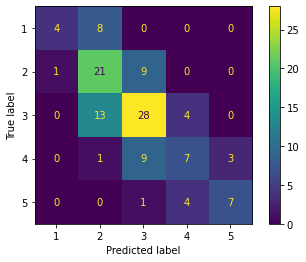

In [49]:
train_pred = fit.predict(X_train)
test_pred = fit.predict(X_test)
print(confusion_matrix(y_train, train_pred), '\n')
print(confusion_matrix(y_test, test_pred), '\n')
print(classification_report(y_test, test_pred))
plot_confusion_matrix(fit, X_test, y_test)

The accuracy and precision of the model for the test data is much lower in a multi-class model, which makes sense as there are more decision boundaries to make and those may overlap.

In [22]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           1       0.62      0.53      0.57        19
           2       0.64      0.67      0.65        76
           3       0.66      0.74      0.70        88
           4       0.62      0.57      0.59        53
           5       0.68      0.59      0.63        44

    accuracy                           0.65       280
   macro avg       0.65      0.62      0.63       280
weighted avg       0.65      0.65      0.65       280

